# Учёт запаздывания

Чтобы учесть запаздывание следует решить систему уравнений


$s=v\left( t-t' \right)+\frac{a}{2}{{\left( t-t' \right)}^{2}}$
и
$R=c\left( t-t' \right)$


In [1]:
var("t, t_prime, dt, v, a, c")

s_t = v*(t-t_prime) + a/2*(t-t_prime)^2
s_dt = v*dt + a/2*dt^2

R_t = c*(t-t_prime)
R_dt = c*dt

show(s_t)
show(R_t)

1/2*a*(t - t_prime)^2 + (t - t_prime)*v

c*(t - t_prime)

Учитывая, что по теореме косинусов

${{R}^{2}}={{R}_{0}}^{2}+{{s}^{2}}-2{{R}_{0}}s\cos \left( \alpha  \right)={{R}_{0}}^{2}+{{s}^{2}}-2{{R}_{0}}s\frac{{{z}_{q'}}-{{z}_{a'}}}{{{R}_{0}}}$

где ${R}_{0}$ расстояние от точки источника заряда к точке наблюдения без учёта запаздывания.

$\mathit{dz} = z_{a'} - z_{q'}$

$(t-t') = dt$

In [2]:
var("R_0, s, z_q, z_a, dz")
R_s = sqrt(R_0^2+s^2-2*s*(z_q-z_a))
show(R_s)

R_ds = sqrt(R_0^2+s^2+2*s*dz)
show(R_ds)

eq_dz = dz == z_a - z_q
show(eq_dz)

sqrt(R_0^2 + s^2 + 2*s*(z_a - z_q))

sqrt(R_0^2 + 2*dz*s + s^2)

dz == z_a - z_q

уравнение для вычисления запаздывающего момента принимает вид

$c^{2}\left( t-t' \right)^{2}={{R}_{0}}^{2}+{{s}^{2}}+2s\left( {{z}_{a'}}-{{z}_{q'}} \right)$

In [3]:
eq = R_t^2 == R_s^2
show(eq)

c^2*(t - t_prime)^2 == R_0^2 + s^2 + 2*s*(z_a - z_q)

In [4]:
eq = R_dt^2 == R_ds^2
show(eq)

eq1 = eq.subs(s == s_dt)
show(eq1)

c^2*dt^2 == R_0^2 + 2*dz*s + s^2

c^2*dt^2 == 1/4*(a*dt^2 + 2*dt*v)^2 + R_0^2 + (a*dt^2 + 2*dt*v)*dz

## Приближение малых скоростей с учётом запаздывания

Решение этой системы имеет весьма сложный вид,
но если мы исследуем вопрос какова будет инертная масса покоя,
то при решении этой системы мы можем положить $v = 0$.

In [5]:
var("dt2")
eq = eq1.subs(v == 0).subs(dt == sqrt(dt2)).expand()
# eq = eq1.subs(dt == sqrt(dt2)).expand()
eq = (eq.rhs() - eq.lhs()).collect(dt2) == 0
show(eq)

1/4*a^2*dt2^2 + R_0^2 - (c^2 - a*dz)*dt2 == 0

In [6]:
poly_coefs = eq.lhs().coefficients(dt2)
show(poly_coefs)

[[R_0^2, 0], [-c^2 + a*dz, 1], [1/4*a^2, 2]]

In [7]:
poly_dict = {}
for k, p in poly_coefs:
    poly_dict[p] = k
show(poly_dict)

{0: R_0^2, 1: -c^2 + a*dz, 2: 1/4*a^2}

In [8]:
discriminant = poly_dict[1]^2 - 4 * poly_dict[0] * poly_dict[2]
show(discriminant)

-R_0^2*a^2 + (c^2 - a*dz)^2

In [9]:
sol_dt2 = (- poly_dict[1] + sqrt(discriminant)) / (2 * poly_dict[2])
show(sol_dt2)

2*(c^2 - a*dz + sqrt(-R_0^2*a^2 + (c^2 - a*dz)^2))/a^2


В этом случае для нахождения запаздывания нужно будет решить уравнение

$-\frac{1}{4} \, a^{2} \mathit{dt}^{4} + c^{2} \mathit{dt}^{2} - a \mathit{dt}^{2} {\left(z_{a} - z_{q}\right)} - R_{0}^{2} = 0$

где
$(t-t') = dt$

Это уравнение имеет 4 решения, 

In [10]:
solution = solve(eq, dt2)
for sol in solution:
    show(sol)

dt2 == 2*(c^2 - a*dz - sqrt(-R_0^2*a^2 + c^4 - 2*a*c^2*dz + a^2*dz^2))/a^2

dt2 == 2*(c^2 - a*dz + sqrt(-R_0^2*a^2 + c^4 - 2*a*c^2*dz + a^2*dz^2))/a^2

In [11]:
var("D")
sol_dt2_a = (- poly_dict[1] + sqrt(D)) / (2 * poly_dict[2])
sol_dt2_b = (- poly_dict[1] - sqrt(D)) / (2 * poly_dict[2])
show(sol_dt2_a)
show(sol_dt2_b)
show(discriminant)
import sympy as sp
print(sp.ccode(eq_dz.rhs()._sympy_(), assign_to = "dz"))
print(sp.ccode(discriminant._sympy_(), assign_to = "D"))
print(sp.ccode(sol_dt2_a._sympy_(), assign_to = "dt2_a"))
print(sp.ccode(sol_dt2_b._sympy_(), assign_to = "dt2_b"))

2*(c^2 - a*dz + sqrt(D))/a^2

2*(c^2 - a*dz - sqrt(D))/a^2

-R_0^2*a^2 + (c^2 - a*dz)^2

dz = z_a - z_q;
D = -pow(R_0, 2)*pow(a, 2) + pow(-a*dz + pow(c, 2), 2);
dt2_a = 2*(sqrt(D) - a*dz + pow(c, 2))/pow(a, 2);
dt2_b = 2*(-sqrt(D) - a*dz + pow(c, 2))/pow(a, 2);


но физически приемлемый смысл при положительном ускорении имеет решение


% $\mathit{dt} = -\frac{\sqrt{2 \, c^{2} - 2 \, a \mathit{dz} + 2 \, \sqrt{-R_{0}^{2} a^{2} + c^{4} - 2 \, a c^{2} \mathit{dz} + a^{2} \mathit{dz}^{2}}}}{a}$

% $\mathit{dt} = \frac{\sqrt{2 \, c^{2} - 2 \, a \mathit{dz} + 2 \, \sqrt{-R_{0}^{2} a^{2} + c^{4} - 2 \, a c^{2} \mathit{dz} + a^{2} \mathit{dz}^{2}}}}{a}$

% $\mathit{dt} = -\frac{\sqrt{2 \, c^{2} - 2 \, a \mathit{dz} - 2 \, \sqrt{-R_{0}^{2} a^{2} + c^{4} - 2 \, a c^{2} \mathit{dz} + a^{2} \mathit{dz}^{2}}}}{a}$

$\mathit{dt} = \frac{\sqrt{2 \, c^{2} - 2 \, a \mathit{dz} - 2 \, \sqrt{-R_{0}^{2} a^{2} + c^{4} - 2 \, a c^{2} \mathit{dz} + a^{2} \mathit{dz}^{2}}}}{a}$

где

$\mathit{dz} = z_{a'} - z_{q'}$

В приближении малых скоростей ${}^{v}/{}_{c}\ll 1$ но при учете запаздывания
$$\overrightarrow{E}=\int\limits_{{{r}_{q}}}\int\limits_{{{\varphi}_{q}}}\int\limits_{{{\theta}_{q}}}\\
{\left\{ -\frac{\overrightarrow{a}R}{{{c}^{2}}} \right\}\frac{\rho \left( {{r}_{q}} \right){{r}_{q}}^{2}\sin \left( {{\theta }_{q}} \right)}{{{R}^{*}}^{2}}\ }d{{\theta }_{q}}d{{\varphi }_{q}}d{{r}_{q}}$$
 Откуда
$${{F}_{z}}=-\frac{\overrightarrow{a}}{{{c}^{^{2}}}}\int\limits_{{{V}_{a}}}{\int\limits_{{{V}_{q}}}{\frac{\rho \left( {{r}_{q}} \right)\rho \left( {{r}_{a}} \right)}{R}}}\ d{{V}_{q}}d{{V}_{a}}$$
где
$\mathit{R} = c\frac{\sqrt{2 \, c^{2} - 2 \, a \mathit{dz} - 2 \, \sqrt{-R_{0}^{2} a^{2} + c^{4} - 2 \, a c^{2} \mathit{dz} + a^{2} \mathit{dz}^{2}}}}{a}$

```
static inline cubareal R_a (cubareal ra, cubareal theta_a, cubareal rq, cubareal theta_q, cubareal phi_q, cubareal c, cubareal a)
{
    cubareal R_0 = R0 (ra, theta_a, rq, theta_q, phi_q);
    cubareal dz = za(ra, theta_a) - zq(rq, theta_q);

    //cubareal tt1 = -2*a*dz + 2*sqrt(-2*a*dz*Sq(c) - Sq(R_0)*Sq(a) + Sq(a)*Sq(dz) + Qu(c)) + 2*Sq(c);
    //cubareal tt2 = -2*a*dz - 2*sqrt(-2*a*dz*Sq(c) - Sq(R_0)*Sq(a) + Sq(a)*Sq(dz) + Qu(c)) + 2*Sq(c);

    cubareal R = c/a*sqrt(2*Sq(c) - 2*a*dz - 2*sqrt(-Sq(R_0*a) + Qu(c) - 2*a*Sq(c)*dz + Sq(a*dz) ) );

    //printf("tt1 = %f, tt2 = %f, R = %f R0 = %f , ra = %f, theta_a = %f, rq = %f, theta_q = %f, phi_q = %f\n", tt1, tt2, R, R_0, ra, theta_a, rq, theta_q, phi_q);
    return R;
}
```

In [12]:
import ctypes
from ctypes.util import find_library

def unload_lib(lib):
    """Unload the loaded CDLL library from memory."""
    if not hasattr(lib, "_handle"):
        raise ValueError("Object is not a loaded CDLL library.")
    
    # Ищем libdl
    libdl_path = find_library("dl")
    if not libdl_path:
        raise RuntimeError("libdl not found — unloading .so is not possible.")
    
    libdl = ctypes.CDLL(libdl_path)

    dlclose = libdl.dlclose
    dlclose.argtypes = [ctypes.c_void_p]
    dlclose.restype = ctypes.c_int

    handle = lib._handle
    ret = dlclose(handle)

    if ret == 0:
        print(f"✅ Library {lib._name} unloaded from memory.")
        return True
    else:
        # you can call ctypes.get_errno(), but dlclose does not set errno on all systems
        print(f"❌ dlclose returned code {ret}. Library may not be unloaded.")
        return False

In [13]:
# after loading:
#lib = ctypes.CDLL("./mendrive_det.so")

# ... work ...

# before recompilation:
if 'lib_inductive' in locals():
    unload_lib(lib)
    del lib
    import gc; gc.collect()


# before recompilation:
if 'lib_gradient' in locals():
    unload_lib(lib)
    del lib
    import gc; gc.collect()

# we recompile
#!gcc -shared -fPIC -O3 -o mendrive_det.so mendrive_det.c -lm

# we load again
#lib = ctypes.CDLL("./mendrive_det.so")

In [14]:
def compile_lib(name):
    import os 
    # Command to execute -lgsl -lgslcblas -lm
    # cmd = "gcc -shared -fPIC -O3 -o {name}.so {name}.c -lm".format(name=name)
    
    cmd = """gcc -shared -fPIC -O3 -o {name}.so \
        {name}.c \
        -DINCLUDE_CUBA_H \
        -I./local/include \
        -L./local/lib \
        -Wl,-rpath='\\$ORIGIN/local/lib' \
        -lcuba -lm
    """.format(name=name)

    # Using os.system() method
    os.system(cmd)

In [15]:
compile_lib("calc_inductive_sphere_mass_a")

In [16]:
compile_lib("calc_gradient_sphere_mass_a")

In [17]:
def load_and_init_lib(name):
    import ctypes
    from ctypes import Structure, c_double, c_int, c_longdouble, POINTER, CDLL, byref

    # Loading the library
    lib = CDLL("./{name}.so".format(name=name))

    # Function binding
    lib.integrate.argtypes = [
        c_double, # r0,       /* Радиус сферы */
        c_double, # q ,       /* заряд */
        c_double, # a,        /* Продольное ускорение */
        c_double, # c,        /* Скорость света */
        POINTER(c_double), # cubareal* integral
        POINTER(c_double), # cubareal* error
        POINTER(c_double), # cubareal* prob)
    ]
    lib.integrate.restype  = c_int

   
    return lib

# Function call:
def c_integrate(lib,
                r0,       # /* Радиус сферы */
                q,        # /* заряд */
                a,        # /* Продольное ускорение */
                c         # /* Скорость света */
                ):

    import ctypes
    from ctypes import c_int,  c_double,  POINTER, byref
    import numpy as np

    NCOMP = 1
    integ = np.zeros(NCOMP, dtype=np.float64)
    error = np.zeros(NCOMP, dtype=np.float64)
    prob  = np.zeros(NCOMP, dtype=np.float64)

    lib.integrate(c_double(r0),
                  c_double(q),
                  c_double(a),
                  c_double(c),
                  integ.ctypes.data_as(POINTER(c_double)),
                  error.ctypes.data_as(POINTER(c_double)),
                  prob.ctypes.data_as(POINTER(c_double))
    )
    
    result_names = [
        "observed_ratio_1_x ",
        "observed_ratio_1_y ",
        "observed_ratio_1_z ",
        "observed_ratio_2_x ",
        "observed_ratio_2_y ",
        "observed_ratio_2_z ",
        "observed_ratio_x   ",
        "observed_ratio_y   ",
        "observed_ratio_z   "];
    for comp in range(0, 1):
        print(result_names[comp], integ[comp], error[comp], prob[comp])
        
    return integ, error, prob

In [18]:
lib_inductive = load_and_init_lib("calc_inductive_sphere_mass_a")

In [19]:
lib_gradient = load_and_init_lib("calc_gradient_sphere_mass_a")

In [20]:
def calc_inductive_and_gradient_sphere_mass(lib,
                                  a):
    r0 = 1;      # /* радиус сферы (половина R1) */
    q  = 1
    c  = 1;      # /* скорость света в м/с */

    integ, error, prob = c_integrate(lib,
                r0, #   /* Радиус сферы */
                q,  #   /* заряд */
                a,  #   /* ускорение */
                c   #   /* Скорость света */
                )
    return integ[0]

In [21]:
calc_inductive_and_gradient_sphere_mass(lib_inductive, a = 0)

-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -nan +- 7.02518e-18  	chisq -nan (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -nan +- 4.44267e-18  	chisq -nan (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -nan +- 3.31115e-18  	chisq -nan (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -nan +- 2.6547e-18  	chisq -nan (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -nan +- 2.221e-18  	chisq -nan (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -nan +- 1.91148e-18  	chisq -nan (5 df)

Iteration 7:  17500 integrand evaluations so far
[1] -nan +- 1.67884e-18  	chisq -nan (6 df)

Iteration 8:  22000 integrand evaluations so far
[1] -nan +- 1.4973e-18  	chisq -nan (7 d

nan

In [22]:
calc_inductive_and_gradient_sphere_mass(lib_gradient, a = 0)

VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	-nan +- 0.00000000	p = -nan
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -nan +- 7.02518e-18  	chisq -nan (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -nan +- 4.44267e-18  	chisq -nan (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -nan +- 3.31115e-18  	chisq -nan (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -nan +- 2.6547e-18  	chisq -nan (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -nan +- 2.221e-18  	chisq -nan (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -nan +- 1.91148e-18  	chisq -nan (5 df)

Iteration 7:  17500 integrand evaluations so far
[1] -nan +- 1.67884e-18  	chisq -nan (6 df)

Iteration 8: 

nan

In [23]:
mass_array                  = []
mass_fermi_array            = []
mass_hysteresis_array       = []
mass_hysteresis_lw_array    = []
mass_hysteresis_fermi_array = []

In [24]:
def append_mass_hysteresis(va):
    global mass_array
    global mass_fermi_array
    global mass_hysteresis_array
    global mass_hysteresis_lw_array
    global mass_hysteresis_fermi_array

    for a in va:
        inductive_ratio_z \
            = calc_inductive_and_gradient_sphere_mass(lib_inductive, a = a)
        gradient_ratio_z \
            = calc_inductive_and_gradient_sphere_mass(lib_gradient,  a = a)

        m1 = gradient_ratio_z
        m2 = inductive_ratio_z

        mass_array += [(a, m1, m2)]
#         mass_fermi_array += [(a, m1_f, m2_f)]
#         mass_hysteresis_array += [(a, m, m_f)]
#         mass_hysteresis_lw_array += [(a, m)]
#         mass_hysteresis_fermi_array += [(a, m_f)]

In [25]:
use_lorentz_factor = 0

In [26]:
append_mass_hysteresis([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1,
                        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2,
                        0.21, 0.22, 0.23, 0.24, 0.25, 0.26])

VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	-nan +- 0.00000000	p = -nan
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20466 +- 0.0831692  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20501 +- 0.029217  	chisq 2.05935e-05 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20763 +- 0.0170808  	chisq 0.0122145 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.20092 +- 0.0104826  	chisq 0.259791 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.20104 +- 0.00798514  	chisq 0.260088 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.2008 +- 0.00631471  	chisq 0.262515 (5 df)

Iteration 7:  17500 integrand evaluations so far
[1] -1.1989 +- 0.00511

observed_ratio_1_x  0.40013485571162255 0.0004409016566141393 7.111291162485696e-12
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.40013486 +- 0.00044090	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20461 +- 0.0831612  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.2062 +- 0.029245  	chisq 0.000418756 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20868 +- 0.0176373  	chisq 0.0117463 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.20089 +- 0.0108722  	chisq 0.326799 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.20101 +- 0.0082238  	chisq 0.327104 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.20076 +- 0.00645637  	chis

observed_ratio_1_x  0.4001234581923759 0.00044127696199506265 3.9074701674478133e-10
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.40012346 +- 0.00044128	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20452 +- 0.0831523  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20589 +- 0.029197  	chisq 0.000310737 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.2088 +- 0.0178158  	chisq 0.0160822 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.20057 +- 0.010938  	chisq 0.358585 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.20107 +- 0.00829799  	chisq 0.363434 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.20097 +- 0.00651496  	chi

observed_ratio_1_x  0.40022082174169926 0.0004439459998876806 4.895222651048909e-10
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.40022082 +- 0.00044395	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.2044 +- 0.0831424  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20615 +- 0.0292588  	chisq 0.000501543 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20953 +- 0.0181912  	chisq 0.0222732 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.20166 +- 0.0112347  	chisq 0.324306 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.20199 +- 0.00850711  	chisq 0.326238 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.20168 +- 0.0066499  	chi

observed_ratio_1_x  0.4001692706926023 0.0004437129703025368 1.3900767290840475e-10
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.40016927 +- 0.00044371	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20425 +- 0.0831316  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20557 +- 0.0292384  	chisq 0.000287046 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.21035 +- 0.0188868  	chisq 0.0462337 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.20086 +- 0.0116745  	chisq 0.454568 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.20215 +- 0.00881661  	chisq 0.482754 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.20168 +- 0.00683602  	c

observed_ratio_1_x  0.40005800488316146 0.0004431597060592874 2.4231578271876965e-10
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.40005800 +- 0.00044316	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20406 +- 0.0831199  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20534 +- 0.029262  	chisq 0.000268847 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.21074 +- 0.0194392  	chisq 0.0612719 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19926 +- 0.011921  	chisq 0.620321 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.20136 +- 0.00899059  	chisq 0.692372 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.20114 +- 0.00692322  	ch

observed_ratio_1_x  0.3999009952054 0.0004418642117833567 7.090529265074009e-10
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39990100 +- 0.00044186	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20384 +- 0.0831072  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20757 +- 0.029331  	chisq 0.00231093 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.21155 +- 0.0194308  	chisq 0.0351097 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19897 +- 0.0119563  	chisq 0.709513 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.20176 +- 0.00920401  	chisq 0.843143 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.20118 +- 0.00706677  	chisq 0

observed_ratio_1_x  0.3998713071118891 0.0004435843694415423 2.4358601994216613e-09
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39987131 +- 0.00044358	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20358 +- 0.0830936  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20717 +- 0.0294116  	chisq 0.00214175 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.21088 +- 0.0192597  	chisq 0.0300186 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19934 +- 0.0119409  	chisq 0.613307 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.20228 +- 0.00926563  	chisq 0.76493 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.20143 +- 0.00714976  	chi

observed_ratio_1_x  0.39978739632619475 0.0004454479409425494 2.629394344207334e-08
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39978740 +- 0.00044545	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20328 +- 0.0830791  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20652 +- 0.0294893  	chisq 0.00173535 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.21378 +- 0.0214929  	chisq 0.131193 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.20424 +- 0.0135852  	chisq 0.459488 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.2051 +- 0.0101689  	chisq 0.468684 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.20369 +- 0.00767432  	chisq

observed_ratio_1_x  0.3996232639146188 0.00043991404097241146 2.5308626946022682e-08
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39962326 +- 0.00043991	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20295 +- 0.0830636  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20608 +- 0.0295199  	chisq 0.00162243 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.21364 +- 0.0215266  	chisq 0.141834 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.20383 +- 0.0136016  	chisq 0.487369 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.20489 +- 0.0102663  	chisq 0.501495 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.20302 +- 0.00772931  	chi

observed_ratio_1_x  0.3994941440321672 0.0004382571184336331 1.760199204707175e-08
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39949414 +- 0.00043826	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20258 +- 0.0830471  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.2047 +- 0.0292207  	chisq 0.000741775 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.21136 +- 0.0203839  	chisq 0.101938 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19745 +- 0.0126426  	chisq 0.85903 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.20046 +- 0.0102513  	chisq 1.02482 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.1987 +- 0.00787037  	chisq 1.

observed_ratio_1_x  0.3994080151420532 0.00044124085159619463 3.765506396225016e-09
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39940802 +- 0.00044124	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20218 +- 0.0830297  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20507 +- 0.0294468  	chisq 0.00138555 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.21215 +- 0.0212427  	chisq 0.122057 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.20398 +- 0.0135201  	chisq 0.370869 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.20504 +- 0.0106538  	chisq 0.387065 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.20091 +- 0.00806757  	chis

observed_ratio_1_x  0.3993469927893302 0.00044092026608343754 8.515870622587321e-09
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39934699 +- 0.00044092	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20174 +- 0.0830113  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20675 +- 0.029636  	chisq 0.00418232 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.2128 +- 0.021448  	chisq 0.0915087 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.20397 +- 0.0136078  	chisq 0.374833 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.205 +- 0.0108489  	chisq 0.390547 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.20103 +- 0.00819882  	chisq 0.

observed_ratio_1_x  0.3992466013956312 0.0004425610076798757 1.1952858874460058e-09
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39924660 +- 0.00044256	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20126 +- 0.0829919  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20704 +- 0.0297825  	chisq 0.00557795 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.21234 +- 0.0211119  	chisq 0.0692721 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.20234 +- 0.0132605  	chisq 0.440325 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.20451 +- 0.0110866  	chisq 0.529452 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.20076 +- 0.0085131  	chis

observed_ratio_1_x  0.39911402979007976 0.0004413066552314001 5.657290131291429e-09
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39911403 +- 0.00044131	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20074 +- 0.0829715  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20599 +- 0.0297278  	chisq 0.00459888 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.21154 +- 0.0210342  	chisq 0.074503 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.20015 +- 0.013237  	chisq 0.560402 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.20286 +- 0.0111887  	chisq 0.70728 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.19936 +- 0.00868472  	chisq 

observed_ratio_1_x  0.39894022074226726 0.00044189131658696376 1.5742490826266327e-09
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39894022 +- 0.00044189	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20018 +- 0.0829501  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20534 +- 0.0297185  	chisq 0.00444836 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.2105 +- 0.0207409  	chisq 0.0632576 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.1985 +- 0.0130294  	chisq 0.61654 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.20167 +- 0.0111024  	chisq 0.832314 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.19789 +- 0.00850324  	chis

observed_ratio_1_x  0.3987651082559914 0.0004459612017467479 5.3306993528961736e-09
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39876511 +- 0.00044596	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.19958 +- 0.0829278  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20461 +- 0.029734  	chisq 0.00423041 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20905 +- 0.0204445  	chisq 0.0464516 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19627 +- 0.0127422  	chisq 0.685017 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.19957 +- 0.0109299  	chisq 0.939262 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.19615 +- 0.00842493  	chis

observed_ratio_1_x  0.39859468677950416 0.00044470184500861054 1.3055723181922013e-08
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39859469 +- 0.00044470	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.19893 +- 0.0829043  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20288 +- 0.0297097  	chisq 0.00260065 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20634 +- 0.0196067  	chisq 0.0266681 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19342 +- 0.0121122  	chisq 0.729605 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.19701 +- 0.0104936  	chisq 1.08284 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.19415 +- 0.00820671  	ch

observed_ratio_1_x  0.3983583535132068 0.0004407834933755905 2.6393876581102657e-08
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39835835 +- 0.00044078	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.19825 +- 0.0828799  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20151 +- 0.029681  	chisq 0.00177626 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20484 +- 0.0191772  	chisq 0.0233556 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19348 +- 0.01187  	chisq 0.591453 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.19676 +- 0.0101523  	chisq 0.875374 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.19443 +- 0.00802445  	chisq 

observed_ratio_1_x  0.39813091212386975 0.00043843934168034715 3.728105354266416e-08
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39813091 +- 0.00043844	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.19752 +- 0.0828544  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.19985 +- 0.0296069  	chisq 0.000912259 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20261 +- 0.0191108  	chisq 0.0157303 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19241 +- 0.0119235  	chisq 0.481821 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.19564 +- 0.010103  	chisq 0.741692 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.19315 +- 0.00790873  	ch

observed_ratio_1_x  0.3979392476146571 0.000439358644059168 5.166582775508298e-08
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39793925 +- 0.00043936	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.19674 +- 0.0828278  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.19815 +- 0.0292162  	chisq 0.000333892 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20061 +- 0.0185208  	chisq 0.0121206 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19314 +- 0.0116447  	chisq 0.280667 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.19568 +- 0.00991236  	chisq 0.453149 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.19315 +- 0.0077788  	chis

observed_ratio_1_x  0.3977713616438151 0.0004429380736137701 2.7528943227465046e-08
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39777136 +- 0.00044294	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.19591 +- 0.0828002  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.19696 +- 0.0291738  	chisq 0.000184959 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.199 +- 0.0181113  	chisq 0.00809448 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19217 +- 0.0113632  	chisq 0.242558 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.19463 +- 0.009556  	chisq 0.402568 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.19236 +- 0.00751936  	chis

observed_ratio_1_x  0.39748820921470207 0.0004465239614612821 1.2079115092643672e-08
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39748821 +- 0.00044652	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.19503 +- 0.0827714  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.19533 +- 0.0290249  	chisq 1.44834e-05 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.19809 +- 0.0179011  	chisq 0.0146556 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19212 +- 0.0112548  	chisq 0.198494 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.19339 +- 0.00913443  	chisq 0.23565 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.19179 +- 0.00718605  	c

observed_ratio_1_x  0.3971976106780278 0.0004442994253578983 2.8560159254540647e-08
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39719761 +- 0.00044430	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.1941 +- 0.0827416  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.19265 +- 0.0288957  	chisq 0.00034884 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.19724 +- 0.0184694  	chisq 0.0429903 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.18921 +- 0.0117094  	chisq 0.358868 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.19176 +- 0.00952362  	chisq 0.49866 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.18995 +- 0.00740784  	chis

observed_ratio_1_x  0.39684123314417646 0.0004413911358790455 7.889559017396222e-09
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39684123 +- 0.00044139	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.19311 +- 0.0827106  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.19148 +- 0.0288752  	chisq 0.000442219 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.19514 +- 0.0181105  	chisq 0.0269234 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.18918 +- 0.0115597  	chisq 0.209574 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.19056 +- 0.00928362  	chisq 0.249944 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.18913 +- 0.00725685  	c

observed_ratio_1_x  0.3964459293679135 0.00043809629007806445 6.379671110417961e-08
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39644593 +- 0.00043810	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.19204 +- 0.0826786  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.19049 +- 0.0289093  	chisq 0.000405136 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.1933 +- 0.0177345  	chisq 0.0156497 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.18873 +- 0.0113118  	chisq 0.127802 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.18921 +- 0.00882526  	chisq 0.132456 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.18843 +- 0.00689147  	ch

observed_ratio_1_x  nan 3.256328617927597e-19 nan


In [27]:
mass_array

[(0.0100000000000000, 0.40013485571162255, -1.2002875353340428),
 (0.0200000000000000, 0.4001234581923759, -1.2002357265204848),
 (0.0300000000000000, 0.40022082174169926, -1.2001745113949633),
 (0.0400000000000000, 0.4001692706926023, -1.2000740426991918),
 (0.0500000000000000, 0.40005800488316146, -1.1999482938712858),
 (0.0600000000000000, 0.3999009952054, -1.1997536669617261),
 (0.0700000000000000, 0.3998713071118891, -1.1995616058044127),
 (0.0800000000000000, 0.39978739632619475, -1.1993162441814331),
 (0.0900000000000000, 0.3996232639146188, -1.199059644988859),
 (0.100000000000000, 0.3994941440321672, -1.1987111690156962),
 (0.110000000000000, 0.3994080151420532, -1.19829288729608),
 (0.120000000000000, 0.3993469927893302, -1.1979084913023992),
 (0.130000000000000, 0.3992466013956312, -1.197475905174186),
 (0.140000000000000, 0.39911402979007976, -1.1970144299927015),
 (0.150000000000000, 0.39894022074226726, -1.1964805956137121),
 (0.160000000000000, 0.3987651082559914, -1.195

In [28]:
# было с ошибкой в знаке перед индуктивной массой
_gradient_sphere_mass = 0.4
_inductive_sphere_mass = 1.2
_electrostatic_energy = 1.2
(0.4+1.2)/1.2

1.33333333333333

In [29]:
_gradient_sphere_mass = 0.4
_inductive_sphere_mass = -1.2
_electrostatic_energy = 0.6 # W = 3 e^2 / (5 a)
(0.4-1.2)/0.6

-1.33333333333333

In [30]:
mass_array

[(0.0100000000000000, 0.40013485571162255, -1.2002875353340428),
 (0.0200000000000000, 0.4001234581923759, -1.2002357265204848),
 (0.0300000000000000, 0.40022082174169926, -1.2001745113949633),
 (0.0400000000000000, 0.4001692706926023, -1.2000740426991918),
 (0.0500000000000000, 0.40005800488316146, -1.1999482938712858),
 (0.0600000000000000, 0.3999009952054, -1.1997536669617261),
 (0.0700000000000000, 0.3998713071118891, -1.1995616058044127),
 (0.0800000000000000, 0.39978739632619475, -1.1993162441814331),
 (0.0900000000000000, 0.3996232639146188, -1.199059644988859),
 (0.100000000000000, 0.3994941440321672, -1.1987111690156962),
 (0.110000000000000, 0.3994080151420532, -1.19829288729608),
 (0.120000000000000, 0.3993469927893302, -1.1979084913023992),
 (0.130000000000000, 0.3992466013956312, -1.197475905174186),
 (0.140000000000000, 0.39911402979007976, -1.1970144299927015),
 (0.150000000000000, 0.39894022074226726, -1.1964805956137121),
 (0.160000000000000, 0.3987651082559914, -1.195

In [31]:
mass_fermi_array

[]

In [32]:
mass_hysteresis_array

[]

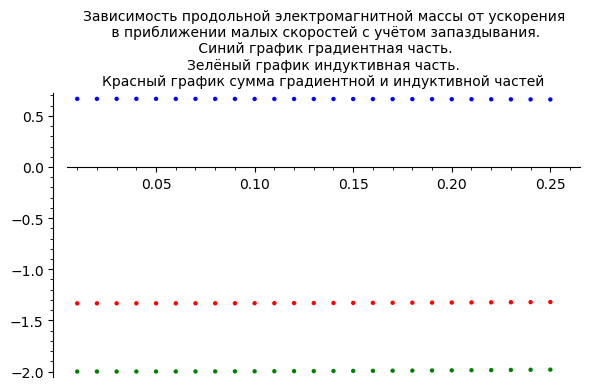

In [33]:
U = 3/5
(
    list_plot([[v[0], v[1]/U] for v in mass_array]) +
    list_plot([[v[0], v[2]/U] for v in mass_array], color = "green") +
    list_plot([[v[0], (v[1]+v[2])/U] for v in mass_array], color = "red")
) .show(title = 
        "Зависимость продольной электромагнитной массы от ускорения\n"
        " в приближении малых скоростей с учётом запаздывания.\n"
        " Синий график градиентная часть.\n"
        "Зелёный график индуктивная часть.\n"
        "Красный график сумма градиентной и индуктивной частей")

$^3$ Обычно говорят, что электромагнитная масса равномерно заряженного сферического слоя с общим зарадом $e$ и радиусом $r$ равна $\frac{2}{3} \frac{e^2}{r c^2}$; если же заметить, что электростатическая энергия $u = \frac{1}{2} \frac{e^2}{r}$, то для массы находим как раз $\left(\frac{4}{3}\right) \frac{u}{c^2}$.

$^3$ Обычно говорят, что электромагнитная масса равномерно заряженной сферы с общим зарадом $e$ и радиусом $r$ равна $\frac{8}{5} \frac{e^2}{r c^2}$; если же заметить, что электростатическая энергия $u = \frac{6}{5} \frac{e^2}{r}$, то для массы находим как раз $\left(\frac{4}{3}\right) \frac{u}{c^2}$.